Image Approximation with Fourier and Wavelets
=============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour overviews the use of Fourier and wavelets for image
approximation.

In [1]:
using PyPlot
using NtToolBox
# using Autoreload
# arequire("NtToolBox")

*Note:* to measure the error of an image $f$ with its
approximation $f_M$, we use the SNR measure, defined as

$$ \text{SNR}(f,f_M) = -20\log_{10} \pa{ \frac{ \norm{f-f_M} }{ \norm{f} } },  $$

which is a quantity expressed in decibels (dB).
The higer the SNR, the better the quality.

Image Loading and Displaying
----------------------------


First we load an image $ f \in \RR^N $ of $ N = N_0 \times N_0 $ pixels.

In [2]:
n0 = 512
f = rescale(load_image("NtToolBox/src/data/lena.png", n0));

Display the original image.

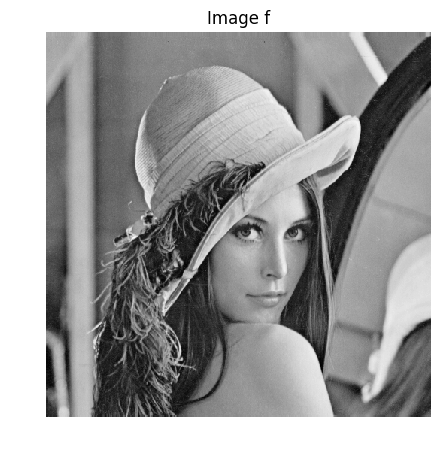

PyObject <matplotlib.text.Text object at 0x32561aa10>

In [3]:
figure(figsize = (5,5))
imageplot(f, "Image f")

Display a zoom in the middle.

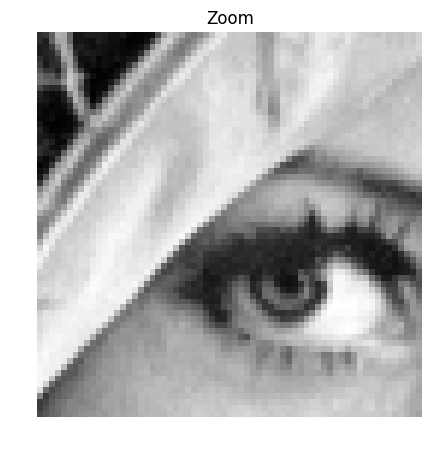

PyObject <matplotlib.text.Text object at 0x325746250>

In [4]:
figure(figsize = (5,5))
imageplot(f[Int(n0/2 - 32) : Int(n0/2 + 32), Int(n0/2 - 32) : Int(n0/2 + 32)], "Zoom")

An image is a 2D array, it can be modified as a matrix.

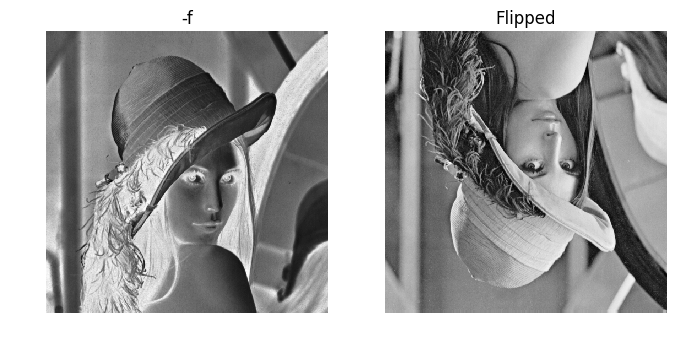

PyObject <matplotlib.text.Text object at 0x3264d2490>

In [5]:
figure(figsize = (8,8))
imageplot(-f, "-f", [1, 2, 1])
imageplot(f[end:-1:1, :], "Flipped", [1, 2, 2])

Blurring is achieved by computing a convolution $f \star h$ with a kernel $h$.


Compute the low pass kernel.

In [6]:
k = 9; #size of the kernel
h = ones(k, k)
h = h/sum(h); #normalize

Compute the convolution $f \star h$.

In [7]:
fh = conv2(Array{Float64, 2}(f), h);

Display.

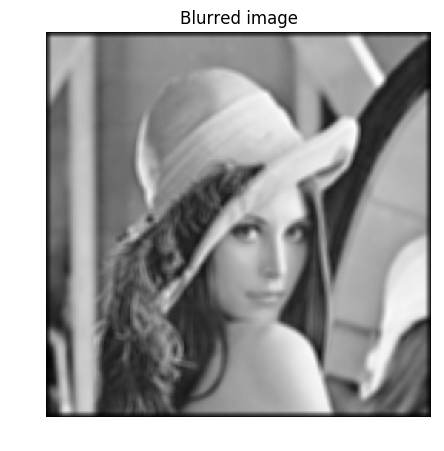

PyObject <matplotlib.text.Text object at 0x326df8050>

In [8]:
figure(figsize = (5,5))
imageplot(fh, "Blurred image")

Fourier Transform
-----------------
The Fourier orthonormal basis is defined as
$$ \psi_m(k) = \frac{1}{\sqrt{N}}e^{\frac{2i\pi}{N_0} \dotp{m}{k} } $$
where $0 \leq k_1,k_2 < N_0$ are position indexes,
and $0 \leq m_1,m_2 < N_0$ are frequency indexes.


The Fourier transform $\hat f$ is the projection of the image on this Fourier
basis

$$ \hat f(m) = \dotp{f}{\psi_m}. $$


The Fourier transform is computed in $ O(N \log(N)) $ operation using the FFT algorithm
(Fast Fourier Transform).
Note the normalization by $\sqrt{N}=N_0$ to make the transform orthonormal.

In [9]:
F = plan_fft(f)
F = (F*f)/n0;

We check this conservation of the energy.

In [10]:
println(@sprintf("Energy of Image:   %f", norm(f)))
println(@sprintf("Energy of Fourier:   %f", norm(F)))

Energy of Image:   262.554108
Energy of Fourier:   262.554138


Compute the logarithm of the Fourier magnitude $ \log\left(\abs{\hat f(m)} +
\epsilon\right) $, for some small $\epsilon$.

In [11]:
L = fftshift(log(abs(F) + 1e-1));

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

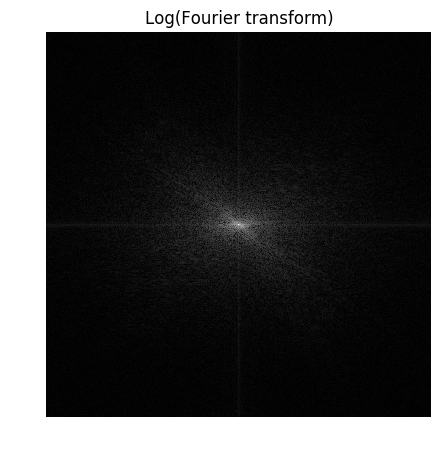

PyObject <matplotlib.text.Text object at 0x32aa4d050>

In [12]:
figure(figsize = (5,5))
imageplot(L, "Log(Fourier transform)")

Linear Fourier Approximation
----------------------------
An approximation is obtained by retaining a certain set of index $I_M$

$$ f_M = \sum_{ m \in I_M } \dotp{f}{\psi_m} \psi_m. $$


Linear approximation is obtained by retaining a *fixed* set $I_M$
of $M = \abs{I_M}$ coefficients. The important point is that $I_M$
does not depend on the image $f$ to be approximated.


For the Fourier transform, a low pass linear approximation
is obtained by keeping only the frequencies within a square.

$$ I_M = \enscond{m=(m_1,m_2)}{ -q/2 \leq m_1,m_2 < q/2 } $$
where $ q = \sqrt{M} $.


This can be achieved by computing the Fourier transform,
setting to zero the $N-M$ coefficients outside the square $I_M$
and then inverting the Fourier transform.


Number $M$ of kept coefficients.

In [13]:
M = Base.div(n0^2, 64);

__Exercise 1__

Perform the linear Fourier approximation with $M$ coefficients.
Store the result in the variable $f_M$.

In [14]:
#run -i nt_solutions/introduction_4_fourier_wavelets/exo1
include("NtSolutions\\introduction_4_fourier_wavelets\\exo1.jl")

LoadError: could not open file /Users/gpeyre/Dropbox/github/numerical-tours/julia/NtSolutions\introduction_4_fourier_wavelets\exo1.jl

In [15]:
## Insert your code here.

Compare two 1D profile (lines of the image).
This shows the strong ringing artifact of the linea approximation.

In [16]:
figure(figsize = (7, 6))

subplot(2, 1, 1)
plot(f[: , Base.div(n0, 2)])
xlim(0, n0)
title("f")

subplot(2, 1, 2)
plot(fM[: , Base.div(n0, 2)])
xlim(0, n0)
title("f_M")

show()

LoadError: UndefVarError: fM not defined

Non-linear Fourier Approximation
--------------------------------
Non-linear approximation is obtained by keeping the $M$ largest
coefficients. This is equivalently computed using a thresholding of the
coefficients
$$ I_M = \enscond{m}{ \abs{\dotp{f}{\psi_m}}>T }. $$


Set a threshold $T>0$.

In [17]:
T = .2;

Compute the Fourier transform.

In [18]:
F = plan_fft(f)
F = (F*f)/n0;

Do the hard thresholding.

In [19]:
FT = F .* (abs(F) .> T);

Display. Note that we use the function fftshift to put the 0 low frequency in the
middle.

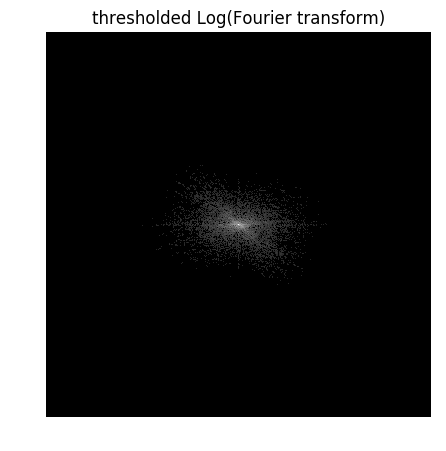

PyObject <matplotlib.text.Text object at 0x32afa2150>

In [20]:
L = fftshift(log(abs(FT) + 1e-1))
figure(figsize = (5,5))
imageplot(L, "thresholded Log(Fourier transform)")

Inverse Fourier transform to obtain $f_M$.

In [21]:
fM = plan_ifft(FT)
fM = real(n0*(fM*FT));

Display.

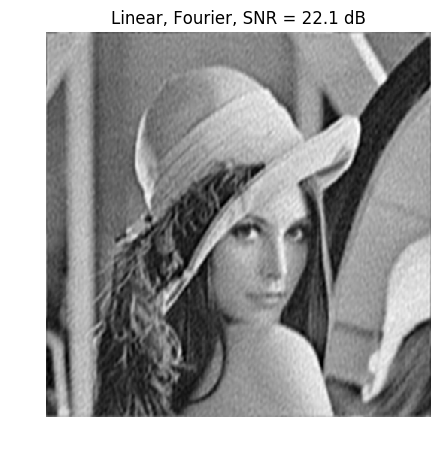

PyObject <matplotlib.text.Text object at 0x3257dac50>

In [22]:
figure(figsize = (5,5))
imageplot(clamP(fM), @sprintf("Linear, Fourier, SNR = %.1f dB", snr(f, fM)))

Given a $T$, the number of coefficients is obtained by counting the
non-thresholded coefficients $ \abs{I_M} $.

In [23]:
m = sum(FT .!= 0)
print(@sprintf("M/N = 1/%d" ,(n0^2)/m))

M/N = 1/31

__Exercise 2__

Compute the value of the threshold $T$ so that the number of
coefficients is $M$. Display the corresponding approximation
$f_M$.

In [24]:
include("NtSolutions\\introduction_4_fourier_wavelets\\exo2.jl")

LoadError: could not open file /Users/gpeyre/Dropbox/github/numerical-tours/julia/NtSolutions\introduction_4_fourier_wavelets\exo2.jl

In [25]:
## Insert your code here.

Wavelet Transform
-----------------
A wavelet basis $ \Bb = \{ \psi_m \}_m $
is obtained over the continuous domain by translating and
dilating three mother wavelet functions $ \{\psi^V,\psi^H,\psi^D\} $.


Each wavelet atom is defined as
$$ \psi_m(x) = \psi_{j,n}^k(x) = \frac{1}{2^j}\psi^k\pa{ \frac{x-2^j n}{2^j} } $$

The scale (size of the support) is $2^j$ and the position is
$2^j(n_1,n_2)$. The index is $ m=(k,j,n) $ for $\{ j \leq 0 \}$.


The wavelet transform computes all the inner products
$ \{ \dotp{f}{\psi_{j,n}^k} \}_{k,j,n} $.


Set the minimum scale for the transform to be 0.

In [26]:
Jmin = 0;

Perform the wavelet transform,  $f_w$ stores all the wavelet coefficients.

In [27]:
fw = NtToolBox.perform_wavelet_transf(f, Jmin, + 1);

In [28]:
# using NPZ
# test = npzread("pgsh.npy")

Display the transformed coefficients.

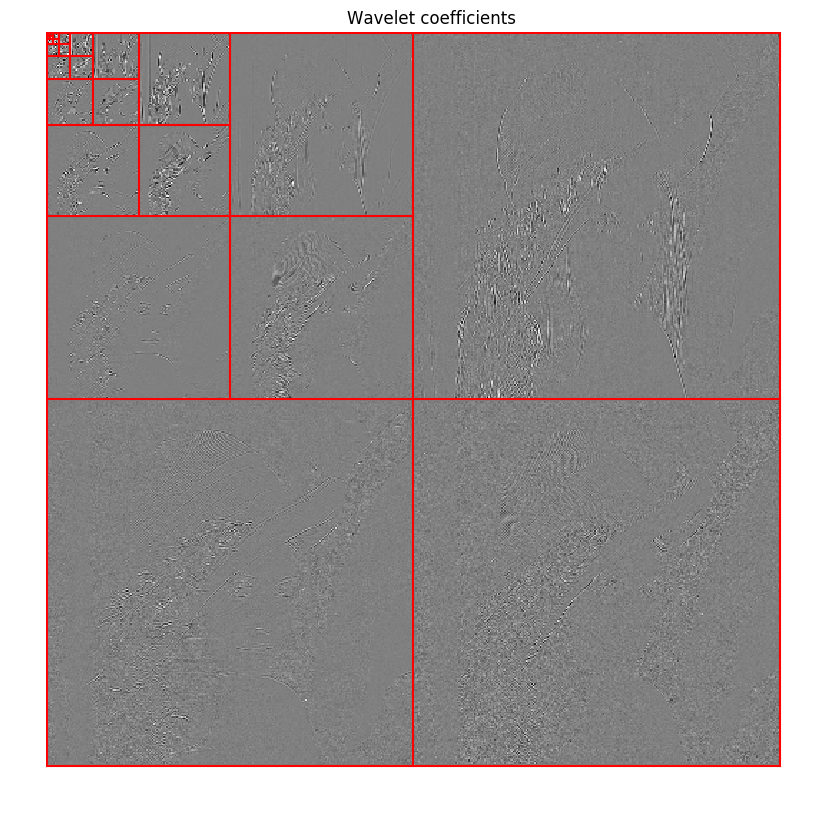

PyObject <matplotlib.text.Text object at 0x32af8a810>

In [29]:
figure(figsize = (10, 10))

NtToolBox.plot_wavelet(fw)
title("Wavelet coefficients")

Wavelet Approximation
---------------------
Linear wavelet approximation with $M=2^{-j_0}$ coefficients is obtained
by keeping only the coarse scale (large support) wavelets:

$$ I_M = \enscond{(k,j,n)}{ j \geq j_0 }. $$


It corresponds to setting to zero all the coefficients excepted those
that are on the upper left corner of $f_w$.

__Exercise 3__

Perform linear approximation with $M$ wavelet coefficients.

In [30]:
include("NtSolutions\\introduction_4_fourier_wavelets\\exo3.jl")

LoadError: could not open file /Users/gpeyre/Dropbox/github/numerical-tours/julia/NtSolutions\introduction_4_fourier_wavelets\exo3.jl

In [31]:
## Insert your code here.

A non-linear approximation is obtained by keeping the $M$ largest wavelet
coefficients.


As already said, this is equivalently computed by a non-linear hard
thresholding.


Select a threshold.

In [32]:
T = .15

0.15

Perform hard thresholding.

In [33]:
fwT = fw.*(abs(fw) .> T);

Display the thresholded coefficients.

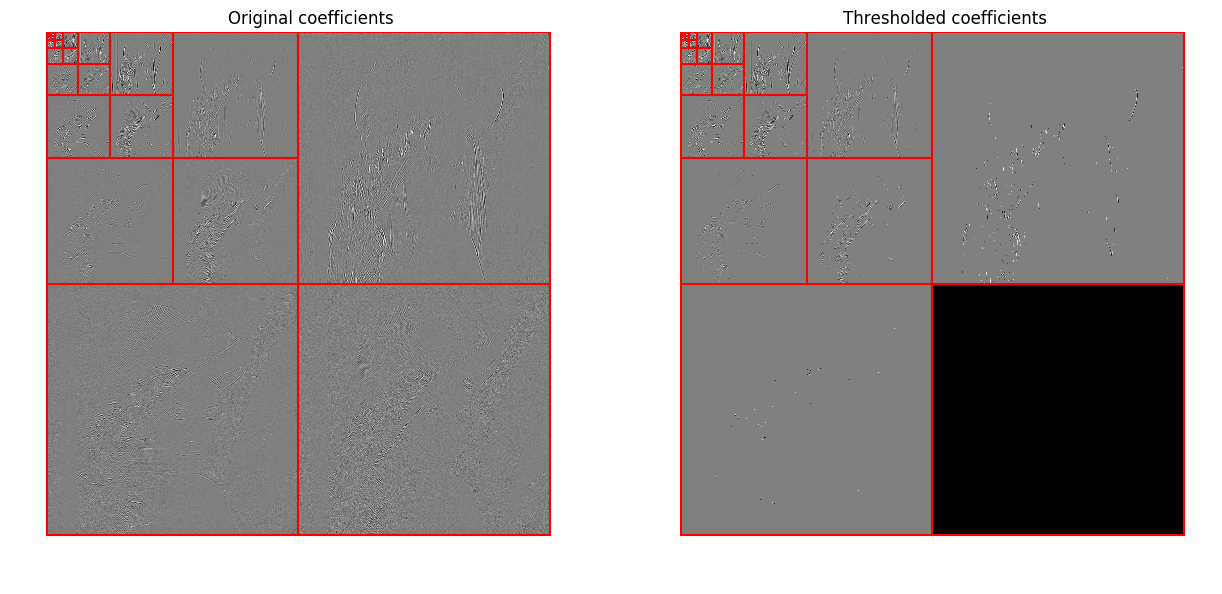

In [34]:
figure(figsize = (15,15))

subplot(1, 2, 1)
plot_wavelet(fw)
title("Original coefficients")

subplot(1, 2, 2)
plot_wavelet(fwT)
title("Thresholded coefficients")

show()

Perform reconstruction.

In [35]:
fM = NtToolBox.perform_wavelet_transf(fwT, Jmin, -1)

512×512 Array{Float32,2}:
 0.686229  0.685407  0.683721  0.681588  …  0.662526   0.615727   0.606579 
 0.685079  0.684285  0.682657  0.6806       0.673313   0.618527   0.607662 
 0.682756  0.682019  0.68051   0.678606     0.678797   0.612439   0.599023 
 0.679865  0.6792    0.677839  0.676126     0.672799   0.596129   0.58039  
 0.676523  0.675941  0.674754  0.673262     0.633161   0.552921   0.536134 
 0.673179  0.672681  0.671667  0.670399  …  0.510544   0.446753   0.432775 
 0.669654  0.669246  0.668416  0.667383     0.36318    0.322226   0.312339 
 0.665888  0.665576  0.664943  0.664164     0.215849   0.197916   0.192186 
 0.66205   0.661835  0.661404  0.660886     0.0984763  0.0994317  0.0972883
 0.658284  0.658166  0.657935  0.657673     0.0765254  0.0812711  0.0803829
 0.654587  0.654564  0.654531  0.654523  …  0.0905613  0.0935602  0.0930404
 0.651038  0.651108  0.651266  0.651503     0.111606   0.112075   0.111789 
 0.64759   0.64775   0.648096  0.648574     0.132954   0.13053

Display approximation.

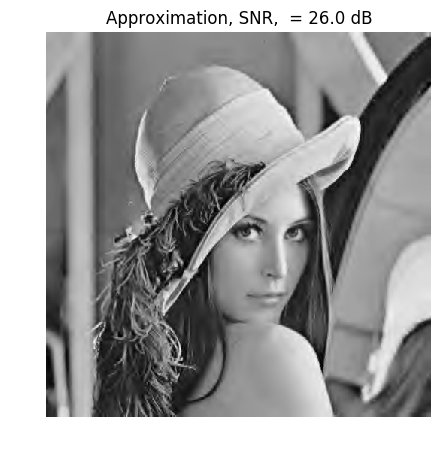

PyObject <matplotlib.text.Text object at 0x33055f150>

In [36]:
figure(figsize = (5, 5))
imageplot(clamP(fM), @sprintf("Approximation, SNR,  = %.1f dB", snr(f, fM)))

__Exercise 4__

Perform non-linear approximation with $M$ wavelet coefficients by
chosing the correct value for $T$. Store the result in the variable
$f_M$.

In [37]:
include("NtSolutions\\introduction_4_fourier_wavelets\\exo4.jl")

LoadError: could not open file /Users/gpeyre/Dropbox/github/numerical-tours/julia/NtSolutions\introduction_4_fourier_wavelets\exo4.jl

In [38]:
## Insert your code here.

Compare two 1D profile (lines of the image).
Note how the ringing artifacts are reduced compared to the Fourier
approximation.

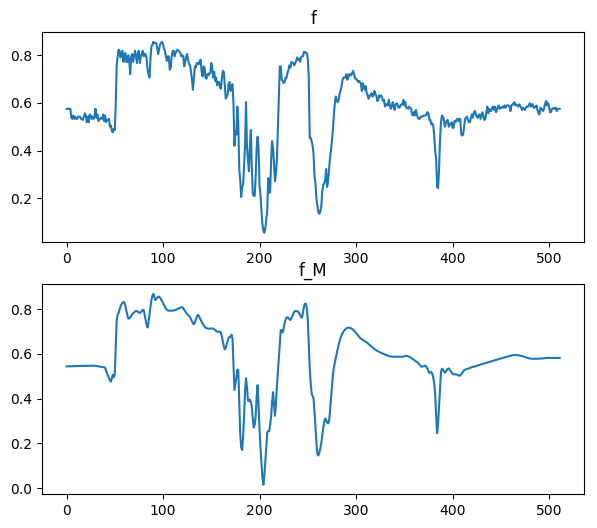

In [39]:
figure(figsize = (7, 6))

subplot(2, 1, 1)
plot(f[:, Base.div(n0, 2)])
title("f")

subplot(2, 1, 2)
plot(fM[:, Base.div(n0, 2)])
title("f_M")

show()